In [ ]:
#Description: this program uses ana artificial recurrent neural network called short term memory
# to predict the closing stock price of a corporation(Apple Inc.) using past 60 day stock price

In [5]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end='2020-07-01')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,110.193657
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,110.070328
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,110.630081
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,111.863426
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,112.888023
...,...,...,...,...,...,...
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.183380
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,352.993561
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.128876


In [7]:
#get number of rows and columns
df.shape

(880, 6)

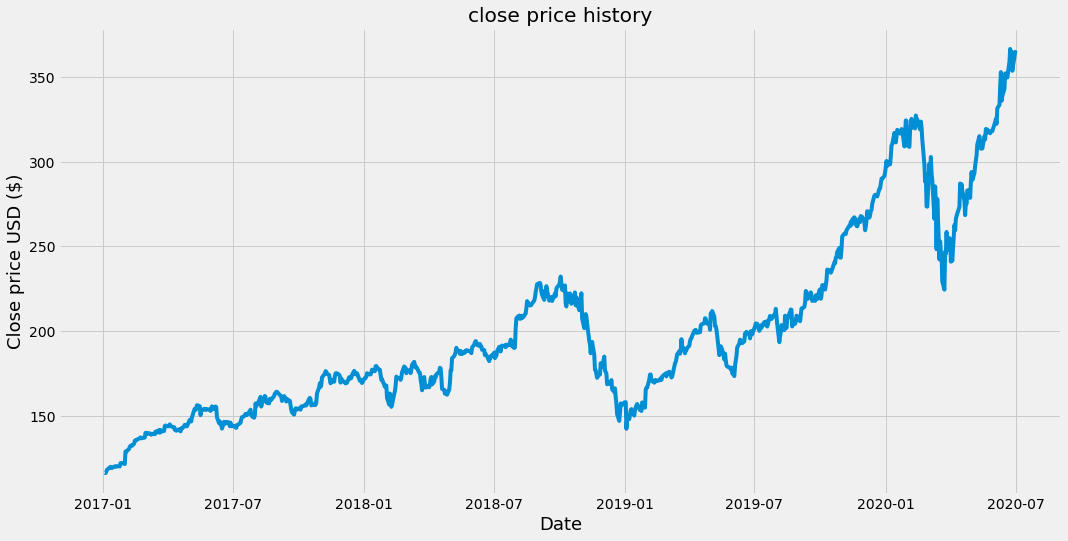

In [11]:
#visualise the closing price
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [12]:
#create a new dataframe with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array 
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len



704

In [14]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.18960847e-04],
       [0.00000000e+00],
       [2.35521122e-03],
       [7.54463695e-03],
       [1.18558189e-02],
       [1.23348527e-02],
       [1.48896384e-02],
       [1.28937101e-02],
       [1.20554239e-02],
       [1.58876026e-02],
       [1.58476755e-02],
       [1.50093893e-02],
       [1.58876026e-02],
       [1.62069584e-02],
       [1.57678518e-02],
       [2.33922820e-02],
       [2.36318141e-02],
       [2.36717107e-02],
       [2.23943178e-02],
       [2.12766029e-02],
       [5.08163476e-02],
       [4.99381343e-02],
       [5.21336676e-02],
       [5.69637800e-02],
       [6.19137041e-02],
       [6.39495290e-02],
       [6.54664540e-02],
       [6.42688848e-02],
       [6.89393497e-02],
       [7.58453054e-02],
       [7.78012762e-02],
       [7.71626254e-02],
       [7.86395929e-02],
       [8.25515953e-02],
       [8.41882711e-02],
       [8.18729870e-02],
       [8.23919478e-02],
       [8.34697052e-02],
       [8.37092678e-02],
       [9.48864175e-02],


In [15]:
#create the training set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.00051896, 0.        , 0.00235521, 0.00754464, 0.01185582,
       0.01233485, 0.01488964, 0.01289371, 0.01205542, 0.0158876 ,
       0.01584768, 0.01500939, 0.0158876 , 0.01620696, 0.01576785,
       0.02339228, 0.02363181, 0.02367171, 0.02239432, 0.0212766 ,
       0.05081635, 0.04993813, 0.05213367, 0.05696378, 0.0619137 ,
       0.06394953, 0.06546645, 0.06426888, 0.06893935, 0.07584531,
       0.07780128, 0.07716263, 0.07863959, 0.0825516 , 0.08418827,
       0.08187299, 0.08239195, 0.08346971, 0.08370927, 0.09488642,
       0.09157323, 0.09484652, 0.09309009, 0.09380866, 0.09173288,
       0.09045545, 0.09229174, 0.09253124, 0.09169298, 0.09756101,
       0.09847912, 0.09568484, 0.10155287, 0.09508602, 0.10139316,
       0.09939723, 0.09827952, 0.09923759, 0.1108938 , 0.11217116])]
[0.1114127012682593]



In [20]:
#convert the x_train and y_train into numpy arrays
X_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#Reshape the data
X_train = np.reshape(x_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(644, 60, 1)

In [26]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
#train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

644/644 [==============================] - 13s 19ms/step - loss: 0.0014


In [31]:
#create the testing data cell
#create a new array containing scaled values from index 644 to 880
test_data = scaled_data[training_data_len -60: , :]
#create the data x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):

 x_test.append(test_data[i-60:i, 0])
 


In [32]:
#convert the data to a numpy
x_test = np.array(x_test)

In [33]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [36]:
#get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6961801702325994

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


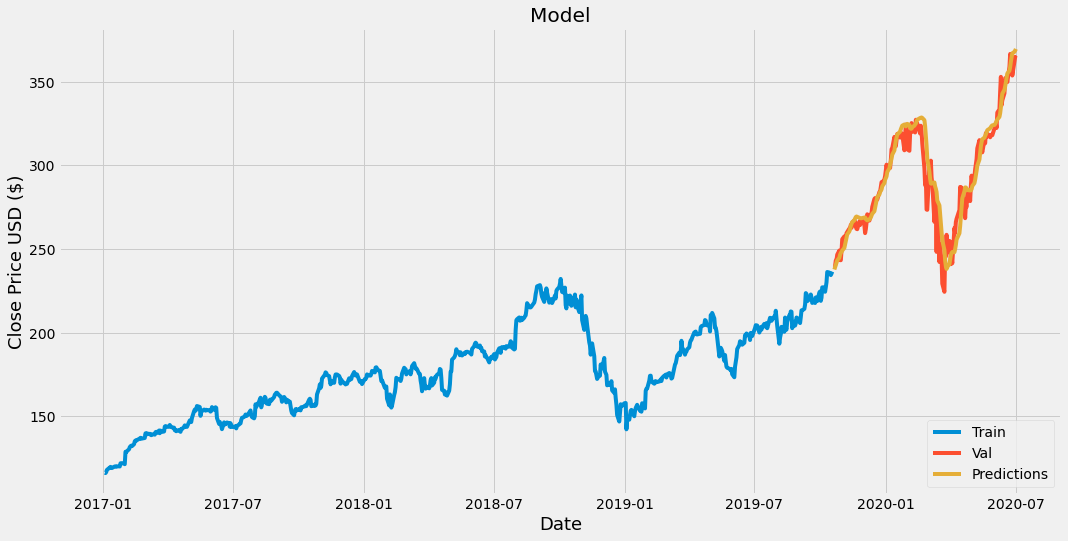

In [37]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [38]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-21,240.509995,237.693787
2019-10-22,239.960007,239.016327
2019-10-23,243.179993,240.259521
2019-10-24,243.580002,241.687164
2019-10-25,246.580002,243.110046
...,...,...
2020-06-25,364.839996,364.425018
2020-06-26,353.630005,366.932220
2020-06-29,361.779999,367.767914


In [39]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2017-01-01', end='2020-07-01')
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price and convert the dataframe into array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test =[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert x_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[370.3476]]


In [40]:
#get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-07-01', end='2020-07-01')
print(apple_quote2['Close'])

Date
2020-07-01    364.109985
Name: Close, dtype: float64
